# Numerical Exercise 12

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import activations
from tensorflow.keras import backend as K

seed = 0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(optimizer='sgd'):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    return model


2024-06-20 13:21:06.107378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exercise 12.1
Change at will and train your DNN by increasing the number of epochs to an adeuqate value. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

## Resolution
I chose to use the following optimizers: sgd, adam and adagrad. I trained the DNN for 16 epochs and plotted the accuracy and loss for training and validation data.

In [24]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('Before to_categorical: ')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [4]:
# training parameters
batch_size = 32
epochs = 16


In [8]:
# sgd optimizer
# create the deep neural net
model_sgd = compile_model()

# train DNN and store training info in history
history_sgd = model_sgd.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(X_test, Y_test))


Epoch 1/16


I0000 00:00:1718889735.411937  401992 service.cc:145] XLA service 0x7f1604008740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718889735.411959  401992 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-06-20 13:22:15.442624: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 13:22:15.508711: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 166/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - acc: 0.2560 - loss: 2.1460

I0000 00:00:1718889737.003216  401992 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.6326 - loss: 1.2007 - val_acc: 0.9131 - val_loss: 0.3170
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8801 - loss: 0.4231 - val_acc: 0.9309 - val_loss: 0.2425
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9054 - loss: 0.3303 - val_acc: 0.9417 - val_loss: 0.2029
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9197 - loss: 0.2873 - val_acc: 0.9472 - val_loss: 0.1768
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9289 - loss: 0.2512 - val_acc: 0.9514 - val_loss: 0.1590
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9380 - loss: 0.2259 - val_acc: 0.9555 - val_loss: 0.1456
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9427 - loss: 0.2065 - val_acc: 0.9587 - val_loss: 0.1339
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9499 - loss: 0.1844 - val_acc: 0.9618 - val_loss: 0.1240
Epoch 9/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/st

In [9]:
# adagrad optimizer
# create the deep neural net
model_adagrad = compile_model(optimizer='adagrad')

# train DNN and store training info in history
history_adagrad = model_adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.4454 - loss: 1.7429 - val_acc: 0.8575 - val_loss: 0.6660
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7707 - loss: 0.7932 - val_acc: 0.8883 - val_loss: 0.4601
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8285 - loss: 0.6062 - val_acc: 0.9033 - val_loss: 0.3856
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8515 - loss: 0.5315 - val_acc: 0.9116 - val_loss: 0.3467
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8649 - loss: 0.4836 - val_acc: 0.9172 - val_loss: 0.3190
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8741 - loss: 0.4477 - val_acc: 0.9208 - val_loss: 0.3001
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8804 - loss: 0.4266 - val_acc: 0.9237 - val_loss: 0.2851
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8845 - loss: 0.4094 - val_acc: 0.9254 - val_loss: 0.2719
Epoch 9/16
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [10]:
# adam optimizer
# create the deep neural net
model_adam = compile_model(optimizer='adam')

# train DNN and store training info in history
history_adam = model_adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9134 - loss: 0.3116 - val_acc: 0.9399 - val_loss: 0.2118
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9143 - loss: 0.3028 - val_acc: 0.9414 - val_loss: 0.2075
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.9181 - loss: 0.2998 - val_acc: 0.9421 - val_loss: 0.2040
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9180 - loss: 0.2921 - val_acc: 0.9437 - val_loss: 0.2007
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9195 - loss: 0.2860 - val_acc: 0.9436 - val_loss: 0.1974
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9216 - loss: 0.2810 - val_acc: 0.9443 - val_loss: 0.1941
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9242 - loss: 0.2782 - val_acc: 0.9457 - val_loss: 0.1910
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9248 - loss: 0.2724 - val_acc: 0.9464 - val_loss: 0.1882
Epoch 9/16
1875/1875 ━━━━━━━━━━━━━━━━━━━

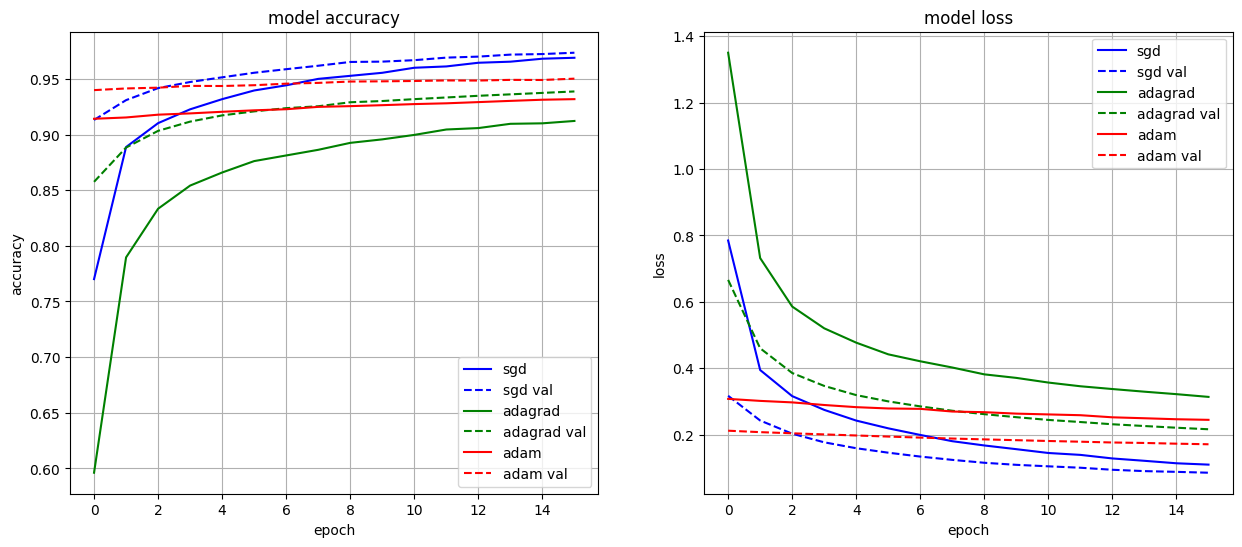

In [11]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history_sgd.history['acc'], label='sgd', color='blue')
plt.plot(history_sgd.history['val_acc'], label='sgd val', color='blue', linestyle='--')
plt.plot(history_adagrad.history['acc'], label='adagrad', color='green')
plt.plot(history_adagrad.history['val_acc'], label='adagrad val', color='green', linestyle='--')
plt.plot(history_adam.history['acc'], label='adam', color='red')
plt.plot(history_adam.history['val_acc'], label='adam val', color='red', linestyle='--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history_sgd.history['loss'], label='sgd', color='blue')
plt.plot(history_sgd.history['val_loss'], label='sgd val', color='blue', linestyle='--')
plt.plot(history_adagrad.history['loss'], label='adagrad', color='green')
plt.plot(history_adagrad.history['val_loss'], label='adagrad val', color='green', linestyle='--')
plt.plot(history_adam.history['loss'], label='adam', color='red')
plt.plot(history_adam.history['val_loss'], label='adam val', color='red', linestyle='--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


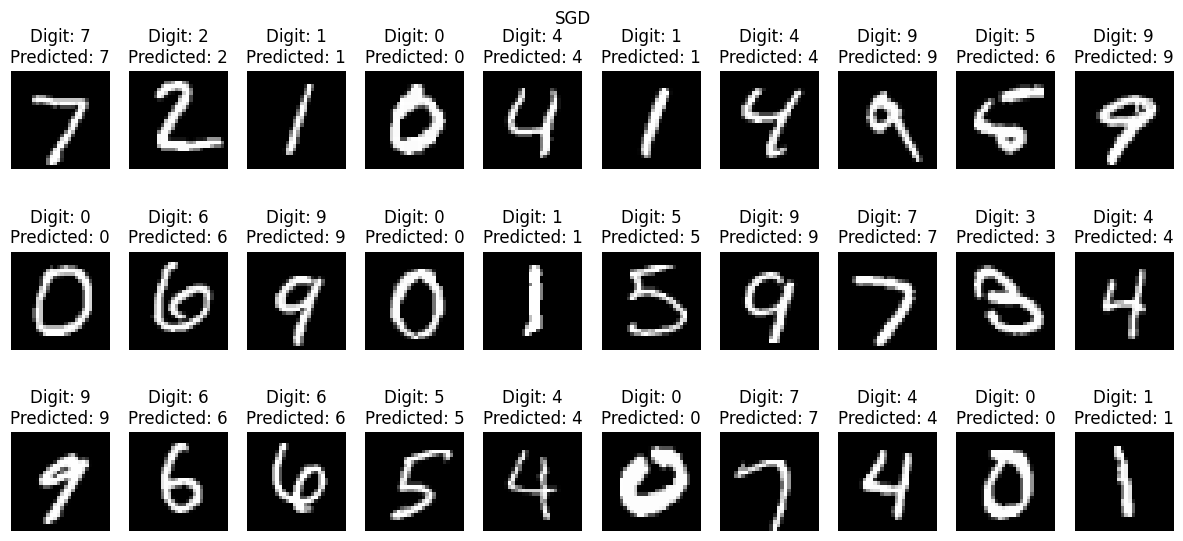

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


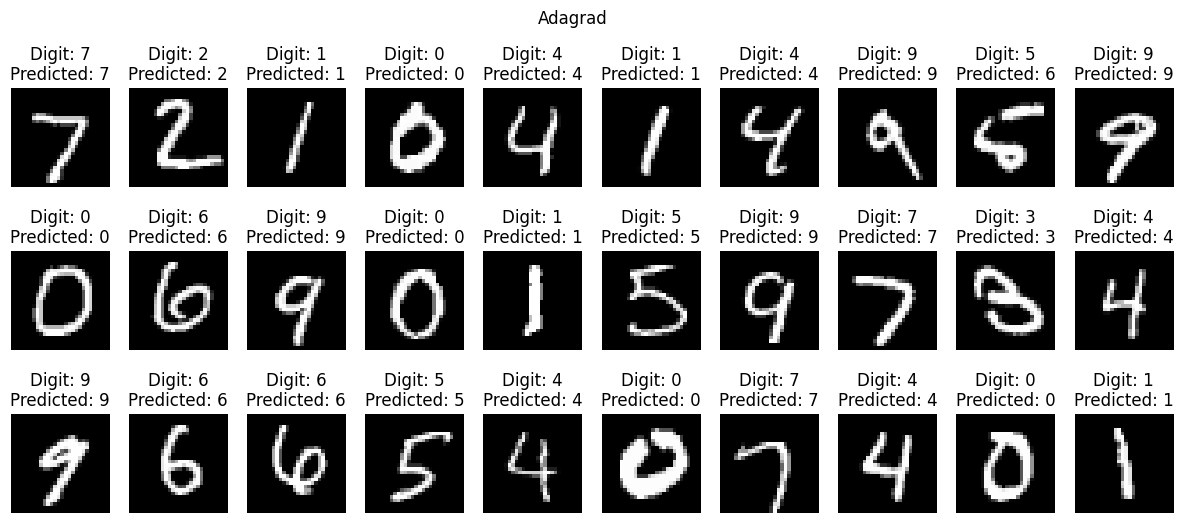

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


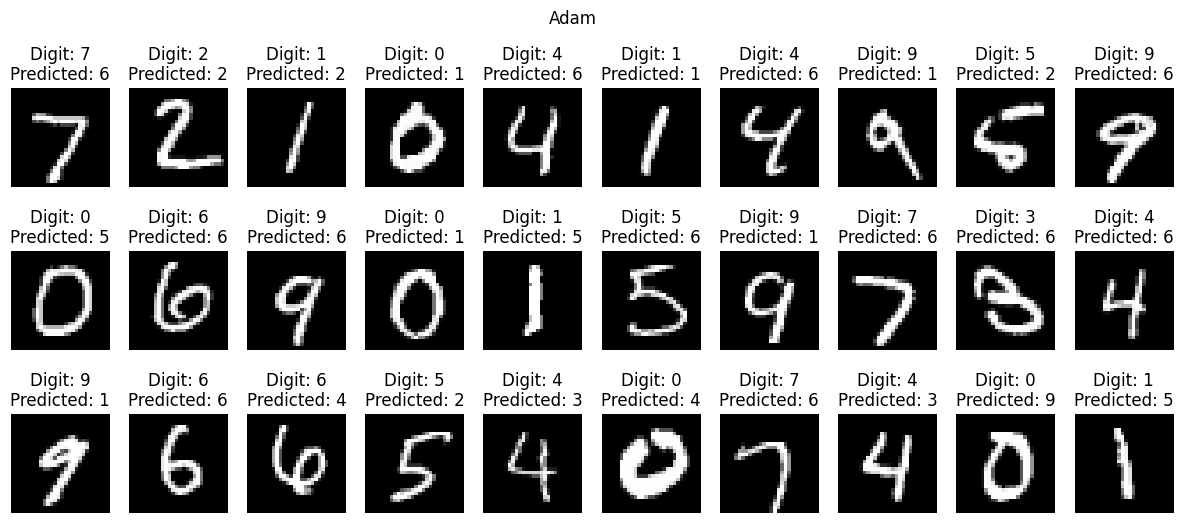

In [32]:
# plot some predictions

predictions = model_sgd.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (15,6))
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.suptitle('SGD')
plt.show()

predictions = model_adagrad.predict(X_test)


plt.figure(figsize=(15,6)) 
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.suptitle('Adagrad')
plt.show()

predictions = model_adam.predict(X_test)


plt.figure(figsize=(15,6)) 
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.suptitle('Adam')
plt.show()